In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler

# Load and Explore Dataset

In [2]:
data_aug = "adasyn"

In [4]:
# Load dataset
df = pd.read_csv(f'./processed_datasets/dataset_preprocessed_{data_aug}.csv')
# View the first 10 rows
df.head(10)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI Category,Diabetes_012
0,0,1,1,-2.127247,1,0,0,0,1,1,...,5,10,20,0,0,11,4,5,0,0
1,1,0,1,-0.170425,0,0,1,0,1,0,...,2,0,0,0,0,11,4,3,2,2
2,1,1,1,0.582198,0,0,0,1,1,1,...,2,10,0,0,0,9,4,7,3,2
3,0,1,1,-0.019901,0,1,1,1,1,1,...,5,0,30,1,1,12,3,4,2,2
4,0,0,1,-0.772524,1,0,0,0,0,0,...,3,0,0,1,1,13,5,6,1,0
5,1,0,1,1.635872,1,0,0,1,1,1,...,3,5,25,1,0,10,4,8,5,0
6,1,1,1,-0.320950,1,0,0,0,0,1,...,4,25,0,0,0,10,5,3,2,0
7,0,0,1,-0.772524,0,0,1,0,0,1,...,4,0,0,0,1,12,6,7,1,2
8,1,1,1,0.130624,0,0,0,0,1,1,...,2,0,0,0,0,7,4,6,3,0
9,1,1,1,1.033773,1,0,0,0,0,0,...,4,0,0,0,1,10,4,8,4,0


In [5]:
# Check if the dataset has null values
df.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
BMI Category            0
Diabetes_012            0
dtype: int64

=> The dataset doesn't contain null values.

In [6]:
# Check the dataset information, including the number of columns, rows, and data types for each column
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553484 entries, 0 to 553483
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                553484 non-null  int64  
 1   HighChol              553484 non-null  int64  
 2   CholCheck             553484 non-null  int64  
 3   BMI                   553484 non-null  float64
 4   Smoker                553484 non-null  int64  
 5   Stroke                553484 non-null  int64  
 6   HeartDiseaseorAttack  553484 non-null  int64  
 7   PhysActivity          553484 non-null  int64  
 8   Fruits                553484 non-null  int64  
 9   Veggies               553484 non-null  int64  
 10  HvyAlcoholConsump     553484 non-null  int64  
 11  AnyHealthcare         553484 non-null  int64  
 12  NoDocbcCost           553484 non-null  int64  
 13  GenHlth               553484 non-null  int64  
 14  MentHlth              553484 non-null  int64  
 15  

=> We have 22 columns (features) and 236,378 rows. The column types are float and int, so encoding is not required for modeling.

In [7]:
# Check for duplicate rows
int(df.duplicated().sum())

44360

=> There are 12,828 duplicate rows that need to be removed to ensure data integrity, avoid bias in the models, and optimize the training process.

In [8]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)
int(df.duplicated().sum())

0

=> Duplicates have been successfully removed. The dataset is now clean and ready for further processing.

In [9]:
# Display dataset description
df = df.reset_index() # Reset the dataset indexes after rempving the duplicates
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,509124.0,267144.620780,160654.907114,0.000000,127280.750000,259446.500000,407230.250000,553483.000000
HighBP,509124.0,0.485658,0.499795,0.000000,0.000000,0.000000,1.000000,1.000000
HighChol,509124.0,0.447123,0.497197,0.000000,0.000000,0.000000,1.000000,1.000000
CholCheck,509124.0,0.975318,0.155153,0.000000,1.000000,1.000000,1.000000,1.000000
BMI,509124.0,0.215357,1.037426,-2.578821,-0.471475,0.043944,0.732723,10.516832
Smoker,509124.0,0.363666,0.481055,0.000000,0.000000,0.000000,1.000000,1.000000
Stroke,509124.0,0.025226,0.156810,0.000000,0.000000,0.000000,0.000000,1.000000
HeartDiseaseorAttack,509124.0,0.075940,0.264903,0.000000,0.000000,0.000000,0.000000,1.000000
PhysActivity,509124.0,0.656649,0.474828,0.000000,0.000000,1.000000,1.000000,1.000000
Fruits,509124.0,0.524473,0.499401,0.000000,0.000000,1.000000,1.000000,1.000000


=> From the description, we can observe that all the columns are categorical except the BMI column, which is continuous. This distinction will guide the adoption of appropriate preprocessing techniques and model training strategies. \
=> This result also indicates that it's better to transform all the categorical columns from float to int for several reasons, such as memory efficiency, improved model performance, and precision issues.

In [10]:
# Transform categorical columns from float to int
categorical_columns = list(df.columns)
categorical_columns.remove("BMI") # Get all columns except BMI
df[categorical_columns] = df[categorical_columns].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509124 entries, 0 to 509123
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 509124 non-null  int64  
 1   HighBP                509124 non-null  int64  
 2   HighChol              509124 non-null  int64  
 3   CholCheck             509124 non-null  int64  
 4   BMI                   509124 non-null  float64
 5   Smoker                509124 non-null  int64  
 6   Stroke                509124 non-null  int64  
 7   HeartDiseaseorAttack  509124 non-null  int64  
 8   PhysActivity          509124 non-null  int64  
 9   Fruits                509124 non-null  int64  
 10  Veggies               509124 non-null  int64  
 11  HvyAlcoholConsump     509124 non-null  int64  
 12  AnyHealthcare         509124 non-null  int64  
 13  NoDocbcCost           509124 non-null  int64  
 14  GenHlth               509124 non-null  int64  
 15  

=> Now all the categorical columns are of type int, except for the BMI column.

# Visualization

## Distribution of the target (Diabetes)

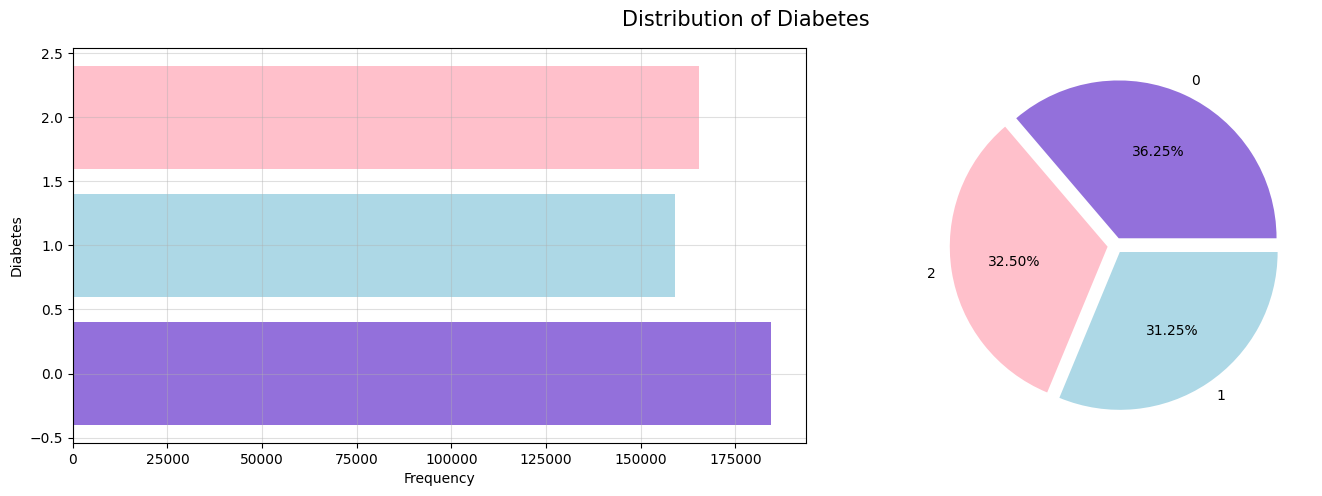

In [11]:
types = df['Diabetes_012'].value_counts()
colors = ['mediumpurple', 'pink' , "lightblue"]

# Create a two-subplot layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart on the first subplot
ax1.barh(y=types.index, width=types.values, color=colors)
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Diabetes')
ax1.grid(alpha=0.4)

# Pie chart on the second subplot
ax2.pie(types.values, labels=types.index, explode=([0.05] * len(types.index)), colors=colors, autopct='%.2f%%')

# Configure the overall layout
fig.suptitle('Distribution of Diabetes', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

=> The target is very imbalanced. Data augmentation should be applied to balance the categories before the modeling phase.

## Distribution of Diabetes per feature

In [12]:
# Define the function responsible for plotting the distribution of the target per feature
def plot_target_distribution_per_feature(feature):
    # Create a crosstab table to see the distribution of diabetes across the feature
    diabetes_bp_crosstab = pd.crosstab(df[feature], df["Diabetes_012"], margins=False)

    # 1. Bar chart (stacked)
    plt.figure(figsize=(8, 6))
    diabetes_bp_crosstab.plot(kind="bar", stacked=True, color=colors)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f"Distribution of Diabetes By {feature}")
    plt.legend(title="Diabetes", labels=["No Diabetes", "Prediabetes", "Diabetes"])
    plt.show()

### Distribution of Diabetes By HighBP

<Figure size 800x600 with 0 Axes>

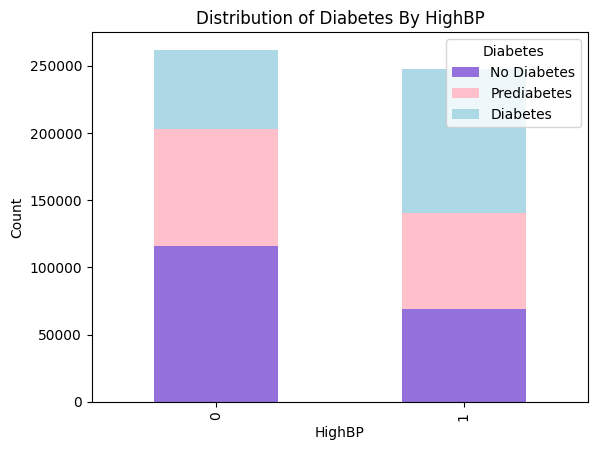

In [13]:
plot_target_distribution_per_feature("HighBP")

### Distribution of Diabetes By PhysActivity

<Figure size 800x600 with 0 Axes>

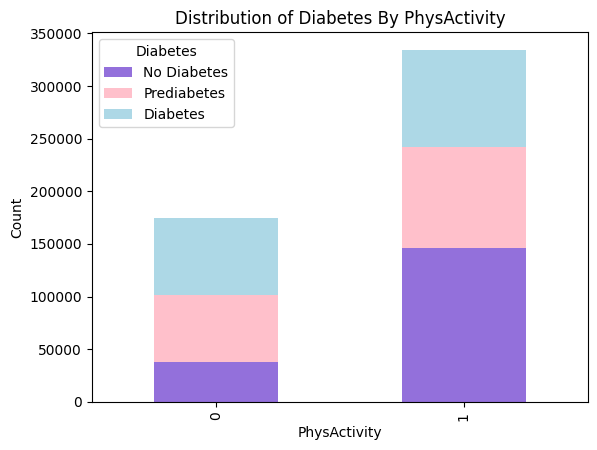

In [14]:
plot_target_distribution_per_feature("PhysActivity")

### Distribution of Diabetes By Smoker

<Figure size 800x600 with 0 Axes>

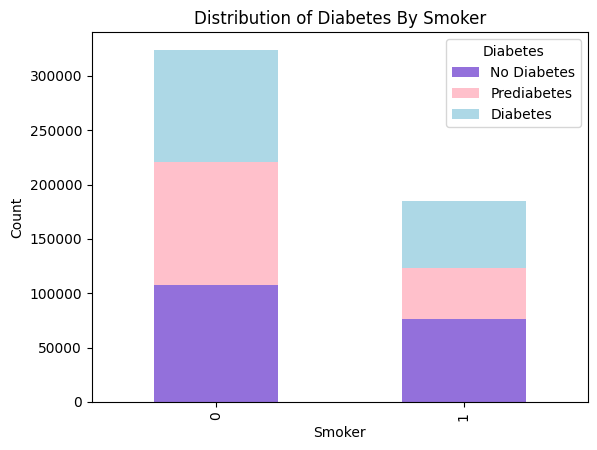

In [15]:
plot_target_distribution_per_feature("Smoker")

### Distribution of Diabetes By Age

<Figure size 800x600 with 0 Axes>

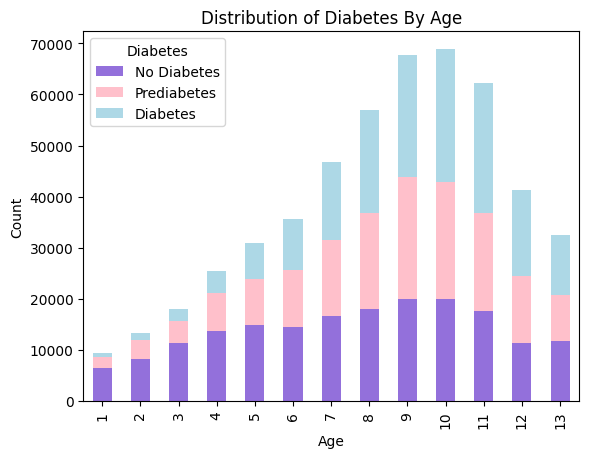

In [16]:
plot_target_distribution_per_feature("Age")

### Distribution of Diabetes By HeartDiseaseorAttack

<Figure size 800x600 with 0 Axes>

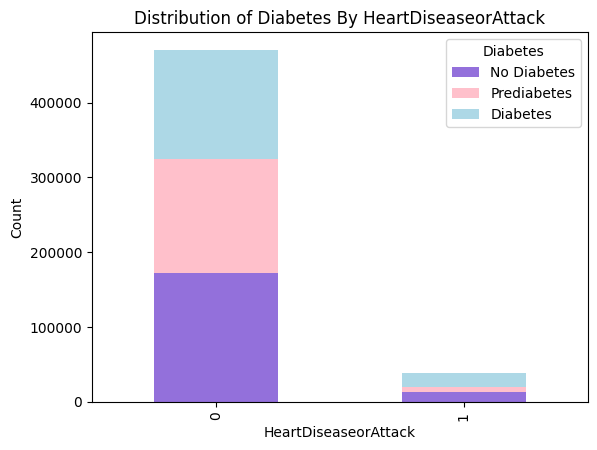

In [17]:
plot_target_distribution_per_feature("HeartDiseaseorAttack")

### Distribution of Diabetes By HvyAlcoholConsump

<Figure size 800x600 with 0 Axes>

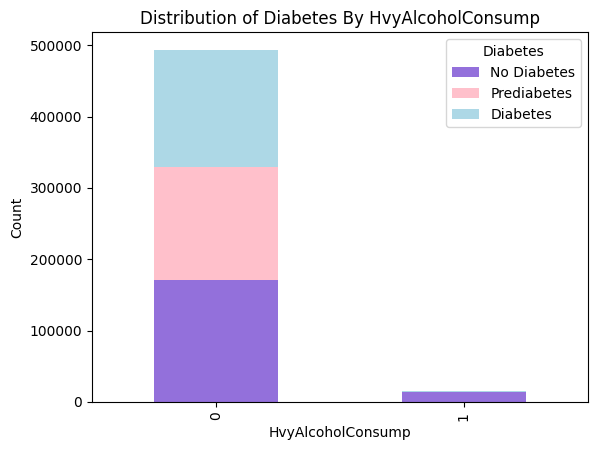

In [18]:
plot_target_distribution_per_feature("HvyAlcoholConsump")

### Distribution of Diabetes By HighChol

<Figure size 800x600 with 0 Axes>

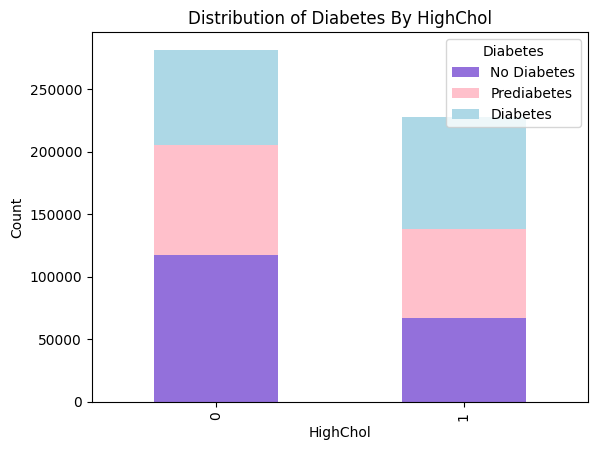

In [19]:
plot_target_distribution_per_feature("HighChol")

# Feature Selection
In this phase, we will select relevant columns after analyzing their correlation with the target.

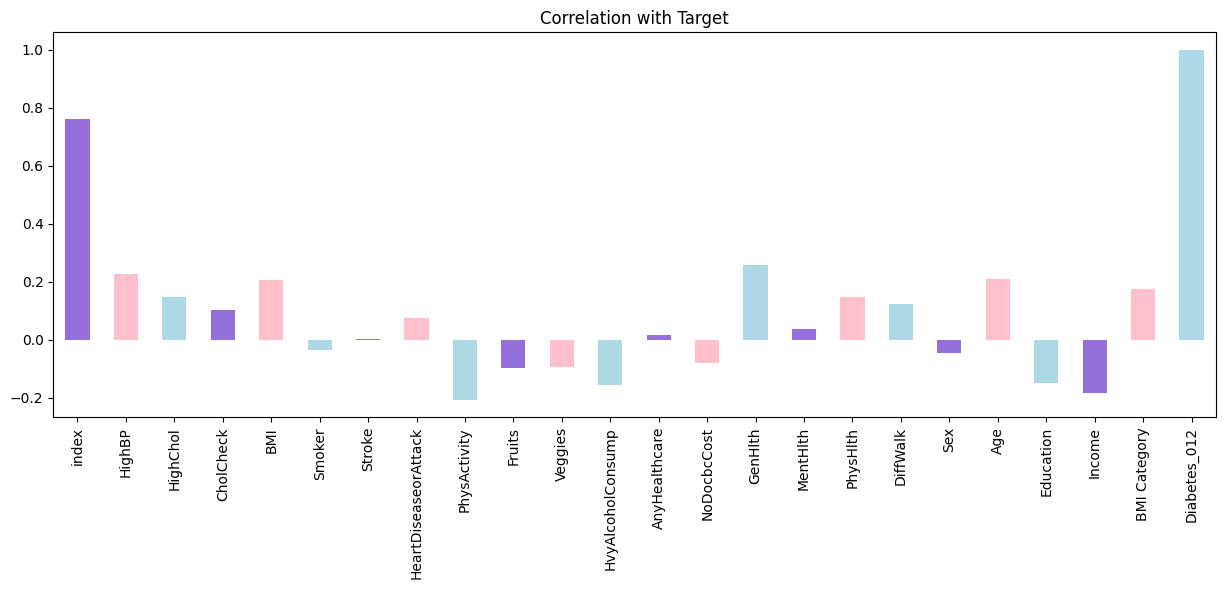

In [24]:
# Calculate correlation with target for numerical features
correlations = df.corrwith(df['Diabetes_012']).drop(['Diabetes_012', 'index'])
correlations.plot(kind='bar', figsize=(15, 5), title='Correlation with Target', color=colors)
plt.show()

Features with higher absolute correlations are more strongly related to the target and may be prioritized in modeling. Features with low correlations contribute less predictive power. \
Hence, we will focus on features with correlations above 0.2 (e.g., GenHlth, HighBP, DiffWalk, HighChol, BMI, BMI Category, and Age). 7 features in total.  \
We will try two methods:
1. Use PCA to retain 7 features.
2. Retain the 7 features stated above.

## PCA

We will use supervised PCA which is a variant of PCA that incorporates the target variable into the dimensionality reduction process. Unlike standard PCA (unsupervised), which focuses only on maximizing variance in the feature set, supervised PCA prioritizes components most relevant to predicting the target variable.

In [24]:
# Define a supervised PCA pipeline
class SupervisedPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.pca = PCA(n_components=n_components)
        self.feature_scores = None

    def fit(self, X, y):
        self.feature_scores = mutual_info_classif(X, y)
        X_weighted = X * self.feature_scores
        self.pca.fit(X_weighted)
        return self

    def transform(self, X):
        X_weighted = X * self.feature_scores
        return self.pca.transform(X_weighted)

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)


In [25]:
# Split the dataset into features and target
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Usage of Supervised PCA
n_components = 7
supervised_pca = SupervisedPCA(n_components=n_components)
X_pca_supervised = supervised_pca.fit_transform(X, y)

# Create the dataset that contains the selected features using supervised PCA 
df_pca = pd.DataFrame(X_pca_supervised, columns=[f'PC{i}' for i in range(1, n_components + 1)])
df_pca['target'] = y
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,target
0,-231331.035101,-0.865503,0.351236,0.064865,-0.048317,0.025306,0.084202,0
1,-231330.169161,-0.044977,-0.026083,0.130563,-0.119992,-0.029371,-0.027803,2
2,-231329.303222,0.277759,-0.057519,0.055979,-0.015296,0.046730,-0.022390,2
3,-231328.437283,0.040600,0.461108,0.131572,-0.013705,-0.066549,0.048883,2
4,-231327.571343,-0.305416,-0.015074,0.175164,-0.038547,0.010318,0.029344,0
...,...,...,...,...,...,...,...,...
509119,247946.469872,0.002786,-0.116373,0.045068,-0.027496,-0.022604,-0.024117,2
509120,247947.335811,-0.475537,-0.078139,0.034754,-0.105557,-0.035796,0.020000,2
509121,247949.067690,-0.788309,-0.063611,0.023623,-0.110730,-0.035114,0.025656,2
509122,247950.799569,-0.937480,-0.056682,0.018314,-0.113196,-0.034788,0.028353,2


In [26]:
# Save PCA dataset
df_pca.to_csv(f"./processed_datasets/dataset_{data_aug}_pca.csv", index=False)

## Manual Selection

In [27]:
df_manual = df[['GenHlth', 'HighBP', 'DiffWalk', 'HighChol', 'BMI', 'BMI Category', 'Age', 'Diabetes_012']]
df_manual

,GenHlth,HighBP,DiffWalk,HighChol,BMI,BMI Category,Age,Diabetes_012
0,5,0,0,1,-2.258096,0,11,0
1,2,1,0,0,-0.371866,0,11,2
2,2,1,0,1,0.353608,0,9,2
3,5,0,1,1,-0.226771,0,12,2
4,3,0,1,0,-0.952244,0,13,0
...,...,...,...,...,...,...,...,...
509119,2,1,0,1,0.320868,0,10,2
509120,3,1,0,1,-0.760450,0,10,2
509121,3,1,0,1,-1.465136,0,10,2
509122,3,1,0,1,-1.801224,0,10,2


In [28]:
# Save manual dataset
df_manual.to_csv(f"./processed_datasets/dataset_{data_aug}_manual.csv", index=False)